# Canadian Natural Gas Markets Data Information 

This Notebooks contains data on the Canadian natural gas markets. 
Data comes from several public sources. 

Text(0.5,1,'Natural Gas Consumption')

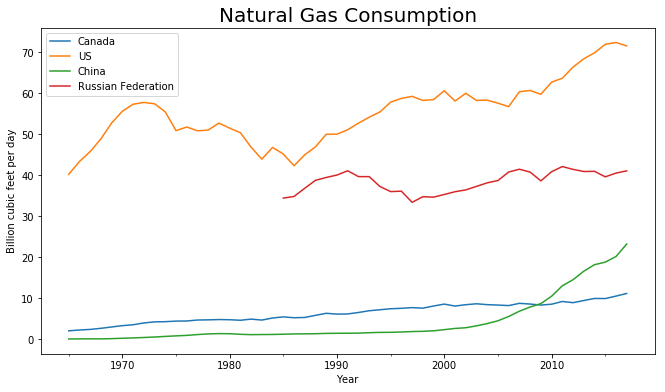

In [210]:
import pandas as pd
import matplotlib.pyplot as plt

url = 'https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2018-all-data.xlsx'
df = pd.read_excel(url, sheet_name = 'Gas Consumption - Bcf', skiprows = 2, skipfooter = 15)
df = df.dropna(how='all').transpose()
df = df.rename(columns=df.iloc[0]).drop(df.index[0])
df = df.reset_index()
df.rename(columns = {'index': 'Year'}, inplace=True)
df = df.drop(df.index[[53, 54, 55]])
df['Year'] = pd.to_datetime(df['Year'], format = '%Y')
df['Total World'] = df['Total North America'] + df['Total S. & Cent. America'] + df['Total Asia Pacific'] + df['Total Africa'] + df['Total Middle East'] + df['Total Europe'] + df['Total CIS']
plot = df.plot(kind = 'line', x = 'Year', y = ['Canada', 'US', 'China', 'Russian Federation'], figsize=(11,6))
plot.set_ylabel("Billion cubic feet per day")
plot.set_title('Natural Gas Consumption', fontsize=20)


Text(0.5,1,'Natural Gas Production')

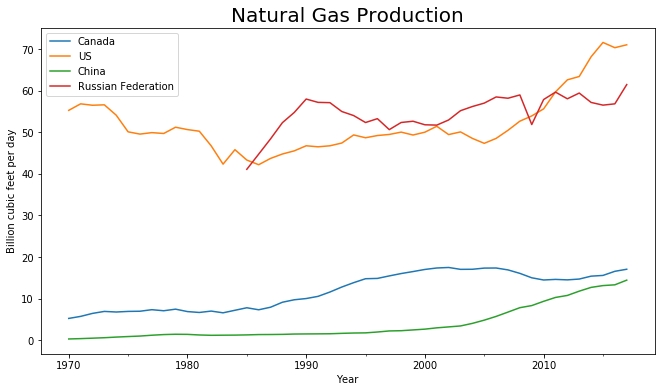

In [211]:
BP_production_url = 'https://www.bp.com/content/dam/bp/business-sites/en/global/corporate/xlsx/energy-economics/statistical-review/bp-stats-review-2018-all-data.xlsx'
df_production = pd.read_excel(BP_production_url, sheet_name = 'Gas Production - Bcf', skiprows = 2, skipfooter = 12)
df_production = df_production.dropna(how='all').transpose()
df_production = df_production.rename(columns=df_production.iloc[0]).drop(df_production.index[0])
df_production = df_production.reset_index()
df_production.rename(columns = {'index': 'Year'}, inplace=True)
df_production = df_production.drop(df_production.index[[48, 49, 50]])
df_production['Year'] = pd.to_datetime(df_production['Year'], format = '%Y')
plot_production = df_production.plot(kind = 'line', x = 'Year', y = ['Canada', 'US', 'China', 'Russian Federation'], figsize=(11,6))
plot_production.set_ylabel("Billion cubic feet per day")
plot_production.set_title('Natural Gas Production', fontsize=20)

In [212]:
NEB_natural_gas_production_url = 'https://www.neb-one.gc.ca/nrg/sttstc/ntrlgs/stt/mrktblntrlgsprdctn2018.xls'
pd.options.display.float_format = '{:,.2f}'.format
prod_df = pd.read_excel(NEB_natural_gas_production_url, sheet_name= '2000+ - cubic feet per day', skiprows = 8)
prod_df = prod_df.dropna(axis = 1, how = 'all')
prod_df = prod_df.dropna(axis = 0, how = 'all')
prod_df = prod_df.drop('Unnamed: 12', axis=1)
prod_df.columns = ['Date', 'Nova Scotia', 'New Brunswick', 'Ontario', 'Saskatchewan', 'Alberta', 'British Columbia', 'Territories', 'Total Canada']
#divide all columns by 1,000 to get Bcf/d
prod_df.tail()

,Date,Nova Scotia,New Brunswick,Ontario,Saskatchewan,Alberta,British Columbia,Territories,Total Canada
225,2018-08-01,68.48,nan,8.73,nan,"10,487.82",nan,nan,nan
226,2018-09-01,58.70,nan,nan,nan,"10,337.86",nan,nan,nan
227,2018-10-01,60.83,nan,nan,nan,nan,nan,nan,nan
228,2018-11-01,nan,nan,nan,nan,nan,nan,nan,nan
229,2018-12-01,nan,nan,nan,nan,nan,nan,nan,nan


Text(0.5,1,'Canadian Monthly Natural Gas Production, by province')

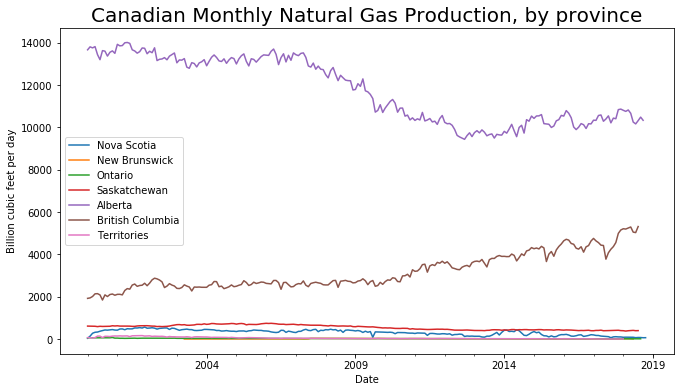

In [213]:
plot_CA_production = prod_df.plot(kind = 'line', x = 'Date', y = ['Nova Scotia', 'New Brunswick', 'Ontario', 'Saskatchewan', 'Alberta', 'British Columbia', 'Territories',], figsize=(11,6))
plot_CA_production.set_ylabel("Billion cubic feet per day")
plot_CA_production.set_title('Canadian Monthly Natural Gas Production, by province', fontsize=20)

In [214]:
nymex_url = 'https://www.eia.gov/dnav/ng/hist_xls/RNGC1d.xls'
nymex_df = pd.ExcelFile(nymex_url)
nymex_df

# xls_file = pd.ExcelFile('../data/example.xls')

Text(0.5,1,'Canadian Natural Gas Demand, by province')

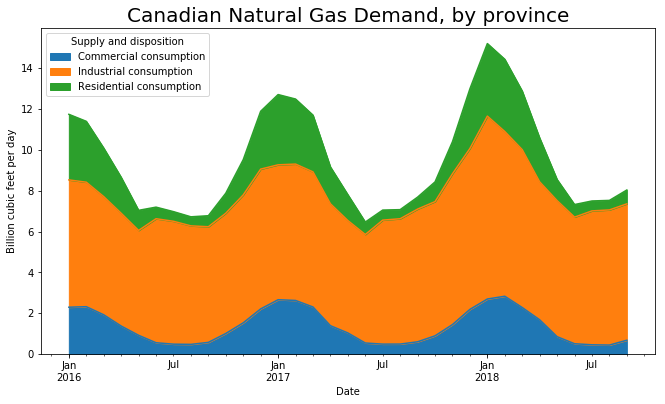

In [215]:
df_demand = pd.read_csv("25100055.csv", usecols = ['REF_DATE', 'GEO', 'Supply and disposition', 'UOM', 'VALUE'])
df_demand = df_demand[df_demand ['GEO'] == 'Canada']
df_demand = df_demand[df_demand ['UOM'] == 'Gigajoules']
df_demand = df_demand[~df_demand['Supply and disposition'].isin(['Gross withdrawals', 'Marketable production', 'Imports', 'Exports', 'Opening inventory', 'Closing inventory', 'Inventory change'])].reset_index(drop = True)
df_demand.columns = ['Date', 'Geography', 'Supply and disposition', 'Unit', 'Value']
df_demand['Date'] = pd.to_datetime(df_demand['Date'], format ='%Y-%m')
df_demand['days in month'] = df_demand['Date'].dt.daysinmonth
df_demand['Bcf/d'] = df_demand['Value']/df_demand['days in month']/1000000*947.8171
df_demand =  df_demand.drop(['Geography', 'Unit', 'Value', 'days in month'], axis = 1)
# df_demand = pd.melt(df_demand, id_vars='Date', value_)
df_demand = df_demand.pivot(index = 'Date', columns = 'Supply and disposition')['Bcf/d'].reset_index()
df_demand.head()
# df_demand.dtypes

plot_demand = df_demand.plot(kind = 'area', x = 'Date', y = ['Commercial consumption', 'Industrial consumption', 'Residential consumption'], figsize=(11,6))
plot_demand.set_ylabel("Billion cubic feet per day")
plot_demand.set_title('Canadian Natural Gas Demand, by province', fontsize=20)

In [216]:
nymex_df = pd.read_excel('RNGC1d.xls', sheet_name= 'Data 1' , skiprows=2, dtype = {'Date': str})
nymex_df.columns = ['Date', 'US$/MMBtu']
nymex_df['Date'] = nymex_df['Date'].str.replace('-15','-01')
nymex_df['Date'] = pd.to_datetime(nymex_df['Date'])
# nymex_graph = nymex_df.plot(kind = 'line', x = 'Date', y = 'US$/MMBtu')
nymex_df.dtypes
nymex_df.head()

,Date,US$/MMBtu
0,1994-01-01,2.35
1,1994-02-01,2.35
2,1994-03-01,2.11
3,1994-04-01,2.11
4,1994-05-01,1.94


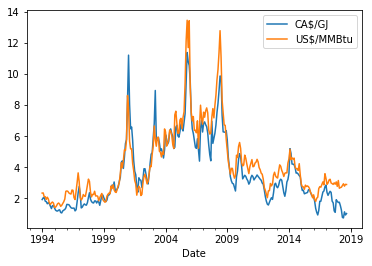

In [217]:
alberta_prices_url = 'https://economicdashboard.alberta.ca/Download/DownloadFile?extension=csv&requestUrl=https%3A%2F%2Feconomicdashboard.alberta.ca%2Fapi%2FOilPrice'
alberta_prices_df = pd.read_csv(alberta_prices_url)
alberta_prices_df = alberta_prices_df[alberta_prices_df ['Type'] == 'NatGas']

alberta_prices_df[['When','Time']] = alberta_prices_df['When'].str.split(" ", 1, expand=True)
alberta_prices_df['When'] = pd.to_datetime(alberta_prices_df['When'], format = '%m/%d/%Y')
alberta_prices_df = alberta_prices_df.drop(['Id', 'Type', 'Unit', 'ModifiedDate', 'Time'], axis = 1)
alberta_prices_df.columns = ['Date', 'CA$/GJ']
# alberta_prices_graph = alberta_prices_df.plot(kind = 'line', x = 'Date', y = 'CA$/GJ')
# alberta_prices_df.dtypes
# alberta_prices_df.join(nymex_df)

prices_df = pd.merge(alberta_prices_df, nymex_df, on='Date')
prices_df.tail()
prices_graph = prices_df.plot(kind = 'line', x = 'Date', y = ['CA$/GJ' , 'US$/MMBtu'])